### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%HTML
<style> 
    code 
    {
    font-size : 13.5px !important;
    color :red !important;
    background-color : White !important;
    border:0.8px !important;
    border-style: solid !important;
    border-color: LightGray !important;
    }
</style>

### Loading and viewing the data

In [3]:
ab = pd.read_csv("train.csv")
ab.head(2)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0


In [4]:
ab.loc[:,'cleaning_fee':'latitude'].head(2)

,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude
0,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524
1,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115


In [5]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

### Dropping irrelevant columns

We can drop columns that will not be useful for analysis. We drop the following columns:<br>
`cleaning_fee`, `first_review`, `last_review`, `description` , `host_has_profile_pic`, `instant_bookable`, `name`, `thumbnail_url`

In [6]:
ab.drop(['cleaning_fee','first_review', 'last_review','description',
         'host_has_profile_pic', 'instant_bookable', 'name', 'thumbnail_url'],axis=1,inplace=True)

In [7]:
#renaming columns
ab = ab.rename(columns={'log_price':'price','accommodates':'acco',})

### Modifying price column

In [8]:
#Converting price from log to actual
ab.price = np.exp(ab.price)

### Describe numeric columns

In [9]:
ab.describe()

,id,price,acco,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,160.370849,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,168.580415,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,1.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,75.000000,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,111.000000,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,185.000000,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,1999.000000,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


explain

### Describe categorical columns

In [10]:
ab.describe(include=['O'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,host_identity_verified,host_response_rate,host_since,neighbourhood,zipcode
count,74111,74111,74111,74111,74111,74111,73923,55812,73923,67239,73145
unique,35,3,67122,5,5,6,2,80,3087,619,769
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,t,100%,2015-03-30,Williamsburg,11211.0
freq,49003,41310,586,72028,32374,32349,49748,43254,246,2862,1368


explain

###  Price distribution

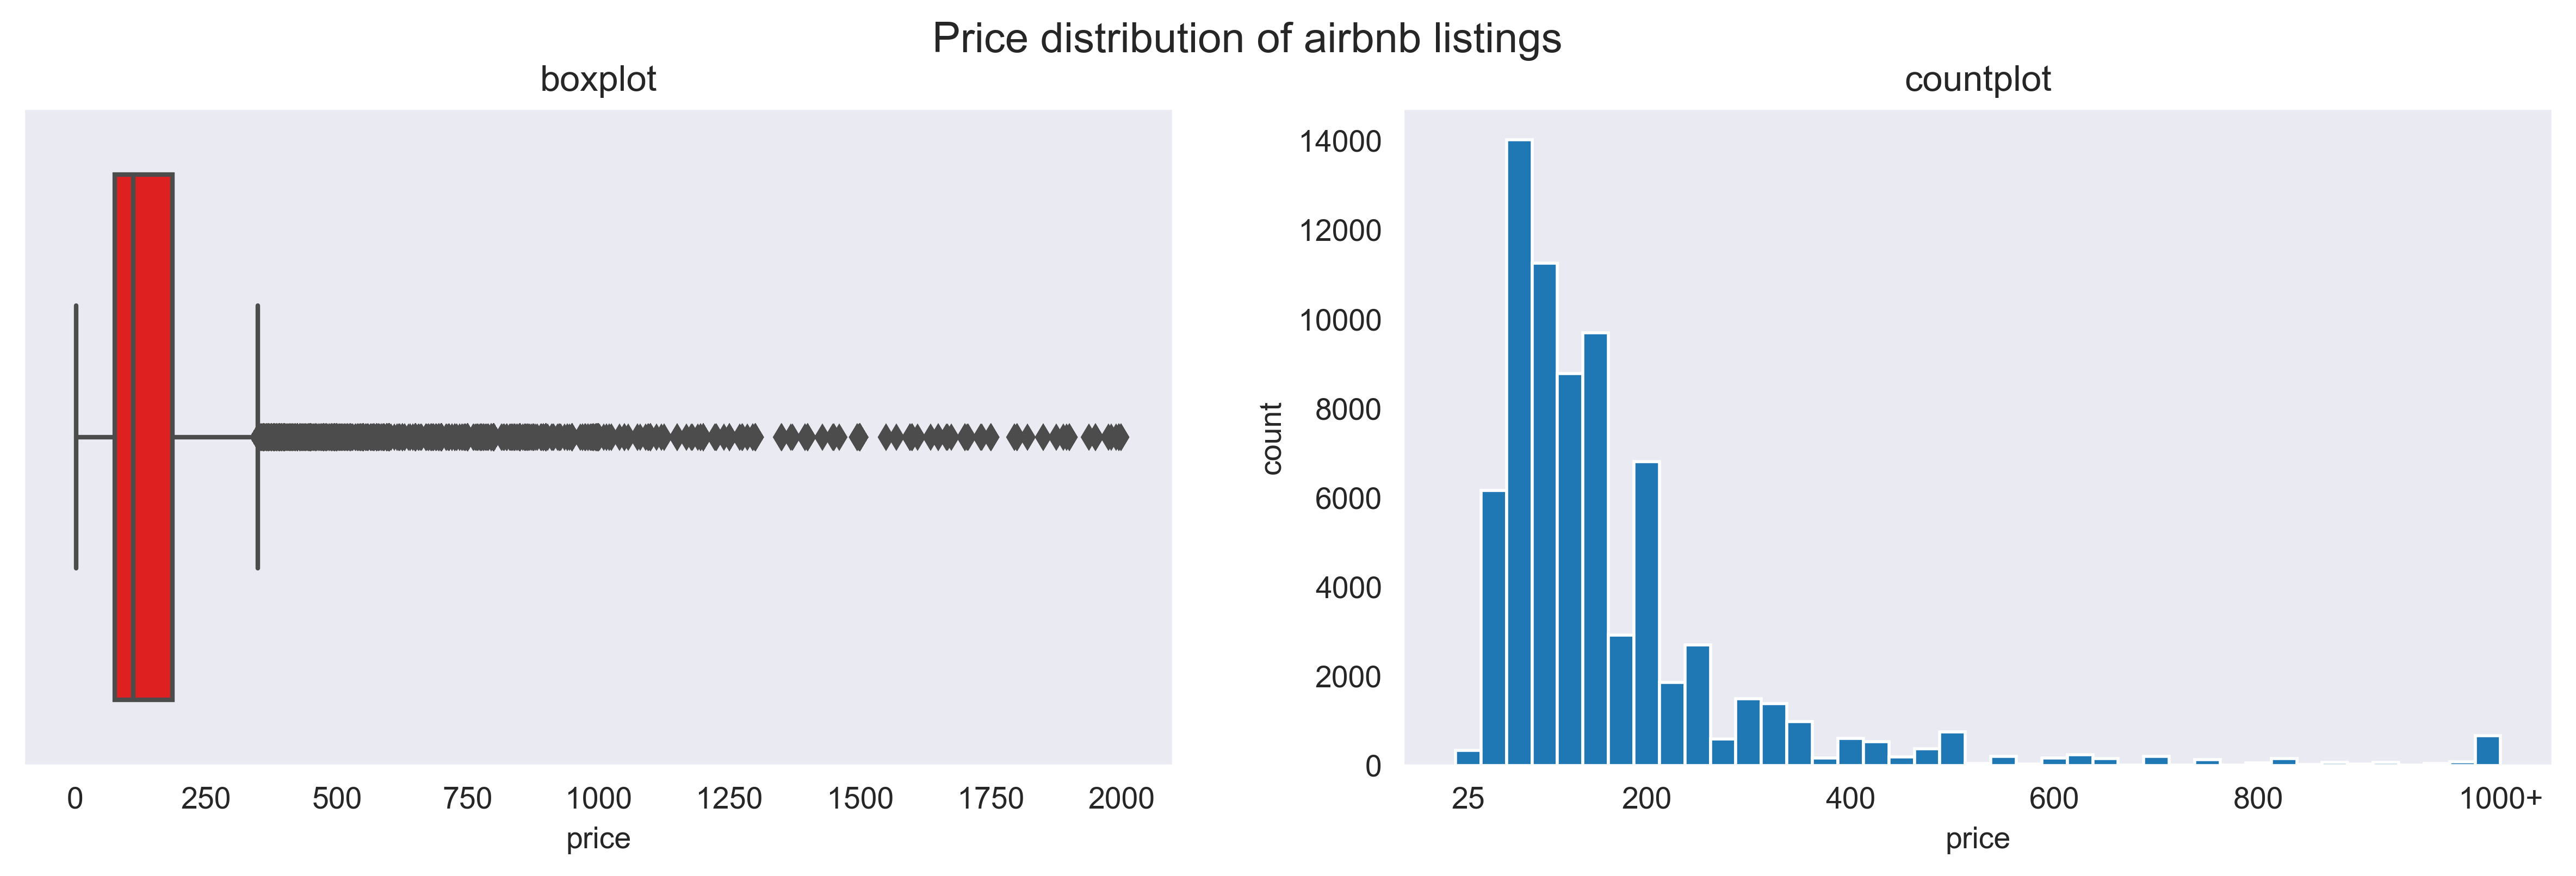

In [11]:
sns.set_style('dark')
fig = plt.figure(figsize=(15,4),dpi=400)
fig.suptitle("Price distribution of airbnb listings",size=14)

#boxplot
ax1 = plt.subplot(1,2,1)
plt.title('boxplot')
sns.boxplot(data=ab,x='price',color='red')
labels=ax1.get_xticks()

#Histogram/Countplot
ax2 = plt.subplot(1,2,2)
bins = np.arange(0,1050,25)
#combine all prices above 1000 in a single bucket and plot a histogram
plt.hist([np.clip(ab.price, bins[0], bins[-1])], bins=bins) 
#use ax.get_ticks() and then modify list accordingly to set xticks.
ax2.set_xticks([12.5,   187.5,   387.5,   587.5,   787.5,  1025]) 
ax2.set_xticklabels(['25','200','400','600','800','1000+']) #matching ticks to appropriate labels
plt.xlabel('price')
plt.ylabel('count')
plt.title('countplot')
plt.show()
bcd=ax2.get_xticks()

Most of the listings lie between the \$75 - \$125 range. We will not eliminate any rows as the price values seem reasonable. None of them seem huge outliers and prices can be high due to a number of reasons, which we will explore further.

### Price per person

We describe a new column `ppp` which stands for price per person. This is calculated by diving the price by number of people that can be accommodated. This can be used as a metric to measure price for different parameters.

In [12]:
ab['ppp']= ab.price/ab.acco

In [13]:
def cleanaxes(ax):
    for i in ax:
        i.spines['right'].set_visible(False)
        i.spines['top'].set_visible(False)
        i.grid(False)

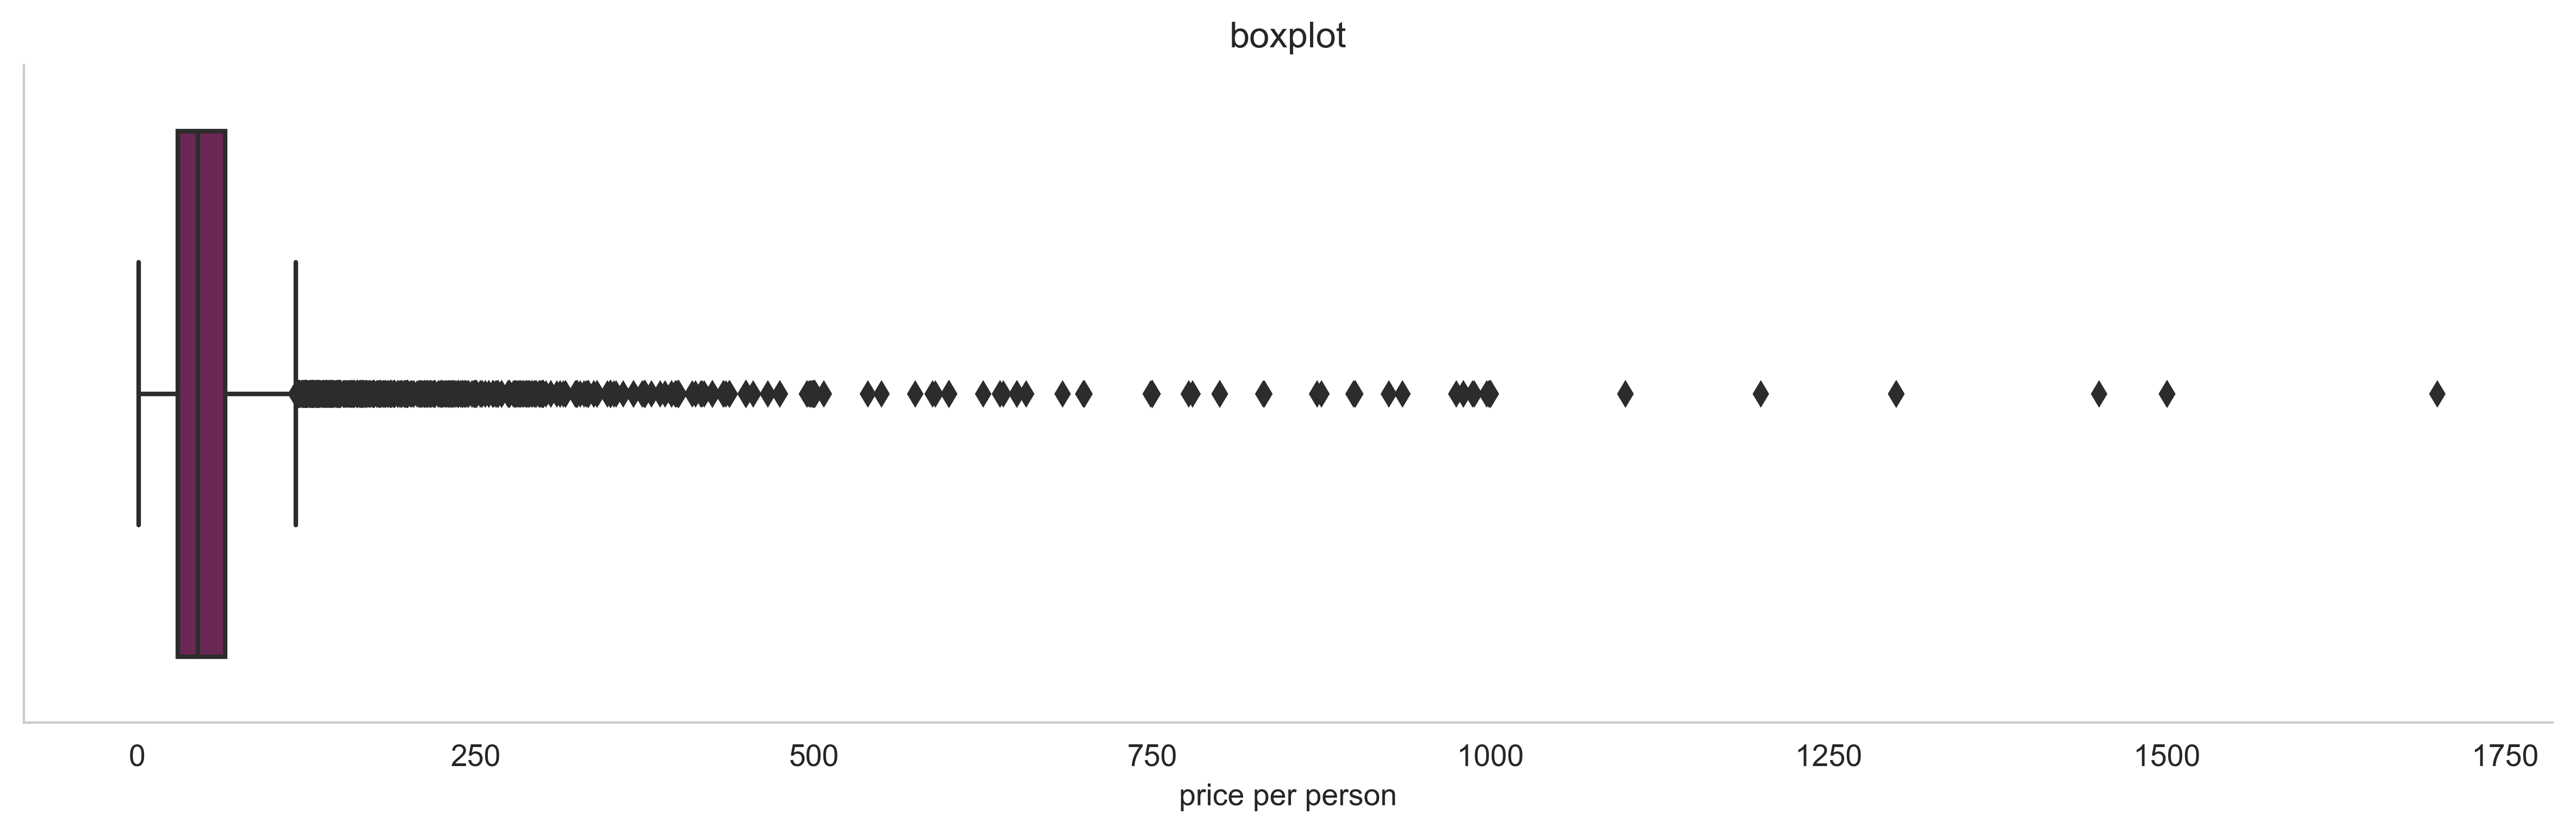

In [14]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,4),dpi=400)
ax=sns.boxplot(data=ab,x='ppp',color='#761C58')
plt.xlabel('price per person')
plt.title('boxplot')
cleanaxes([ax])
plt.show()

explain

In [15]:
ab=ab.loc[ab.ppp<1000]

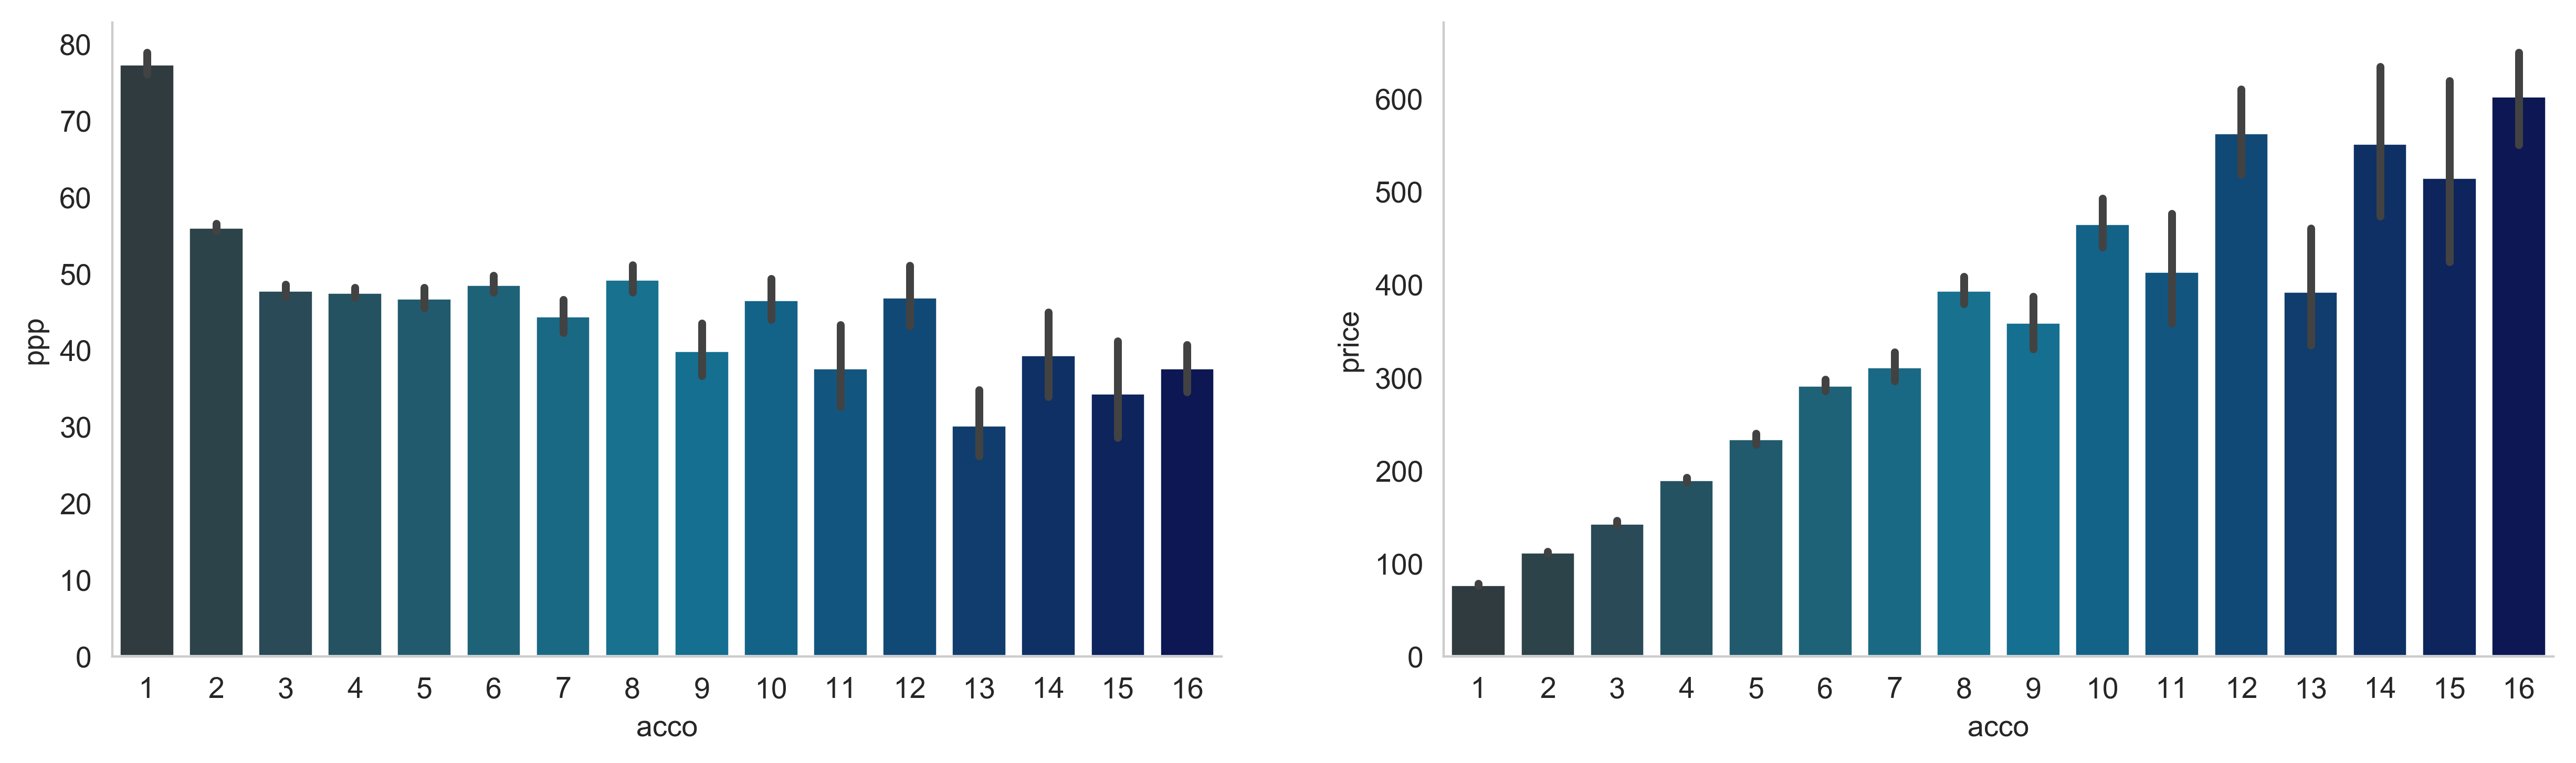

In [16]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,4),dpi=400)
ax1=plt.subplot(1,2,1)
sns.barplot(data=ab,x='acco',y='ppp',palette='ocean_d')
ax2=plt.subplot(1,2,2)
sns.barplot(data=ab,x='acco',y='price',palette='ocean_d')
cleanaxes([ax1,ax2])
plt.show()

Correlation between ppp and price

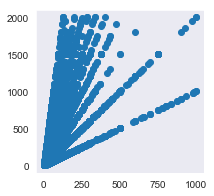

In [17]:
sns.set_style('dark')
fig = plt.figure(figsize=(3,3))
ax=plt.subplot()
plt.scatter(ab.ppp,ab.price)
plt.show()

In [18]:
np.corrcoef(ab.price,ab.ppp)

array([[ 1.        ,  0.60170877],
       [ 0.60170877,  1.        ]])

In [19]:
np.mean(ab.ppp)

54.94325627844579